In [3]:
!pip install tensorflow
!pip install anvil-uplink
import numpy as np
import anvil.media
import matplotlib.pyplot as plt
%matplotlib inline

import anvil.server

anvil.server.connect("server_YY6SP6KOUNSC4ZV6E7NWXGCK-SXKRM2Z5TSDCIZ2L")
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=bd2a0009e3dd6b61f9aee5ea9fbe23c4fc25b20a2c9d626d2bd438f30f374f4d
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "MNIST" as SERVER


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


11490434/11490434 [==============================] - 0s 0us/step


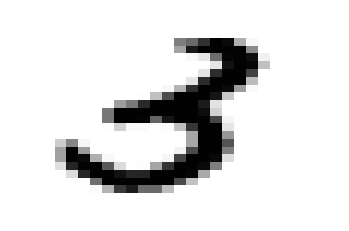

In [5]:
plt.pcolor( 1-x_train[811,::-1,:] , cmap = 'gray' );
plt.axis('off');

In [6]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

In [7]:
def get_model(val_split):
  NNmodel2 = tf.keras.models.Sequential()
  NNmodel2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
  NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
  NNmodel2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
  NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
  NNmodel2.add(tf.keras.layers.Flatten())
  NNmodel2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
  NNmodel2.add(tf.keras.layers.Dropout(0.5))
  NNmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
  NNmodel2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  NNmodel2.summary()
  hist=NNmodel2.fit(x_train,y_train,epochs=16,validation_split=val_split,batch_size=32)
  return (NNmodel2,hist)

In [8]:
import os

if os.path.exists('mnist_model'):
  model = tf.keras.models.load_model('mnist_model')
else:
  model,hist=get_model(0.2)
  if hist.history['val_accuracy'][-1] > 0.99:
    model,hist=get_model(0)
    print('accuracy of the entire training set is', hist.history['accuracy'][-1])
    model.save('mnist_model')
  else:
    print('val_accuracy < 0.99')
    raise SystemExit("Stop right there!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/hw_1.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9924
Test accuracy 0.9923999905586243


313/313 [==============================] - 1s 2ms/step


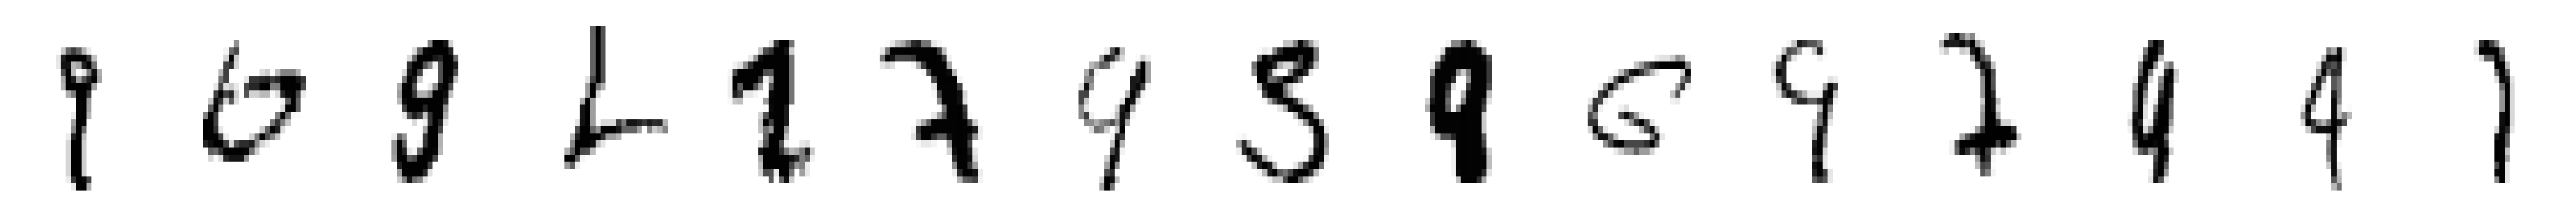

In [11]:
# Plot a few of the numbers you misclassify from the test set.
# 15 numbers
pred_probs2 = model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
error_nums=x_test[pred2!=y_test].reshape(x_test[pred2!=y_test].shape[:3])
n=15
plt.figure(figsize=(n*5,6))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.pcolor( 1-error_nums[i,::-1,:] , cmap = 'gray' )
    plt.axis('off')

313/313 [==============================] - 1s 2ms/step


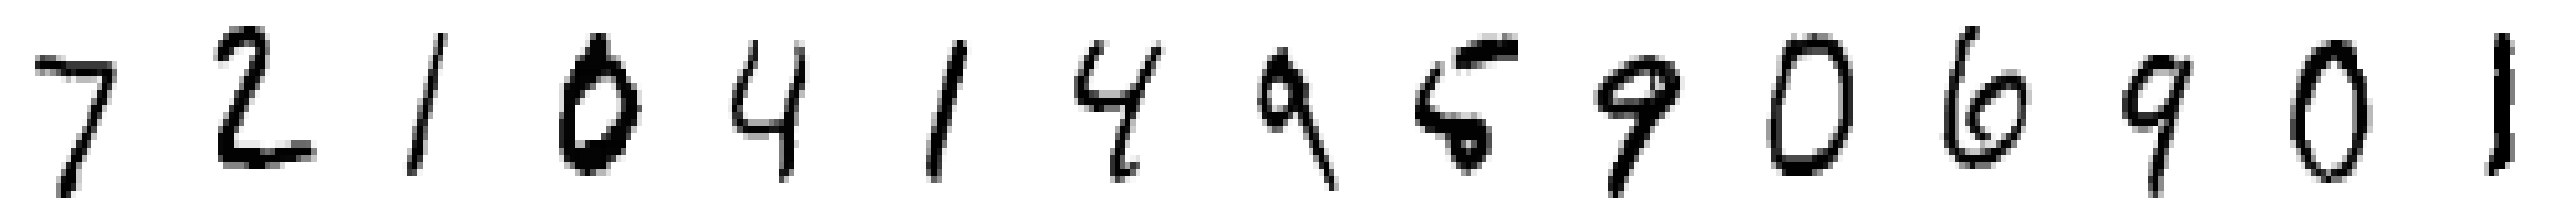

In [12]:
# Plot a few of the numbers you classify from the test set.
# 15 numbers

pred_probs2 = model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
error_nums=x_test[pred2==y_test].reshape(x_test[pred2==y_test].shape[:3])
n=15
plt.figure(figsize=(n*5,6))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.pcolor( 1-error_nums[i,::-1,:] , cmap = 'gray' )
    plt.axis('off')